<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-+-Datensatz-einlesen" data-toc-modified-id="Imports-+-Datensatz-einlesen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports + Datensatz einlesen</a></span></li><li><span><a href="#Erstellung-der-Worthäufigkeitstabelle" data-toc-modified-id="Erstellung-der-Worthäufigkeitstabelle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Erstellung der Worthäufigkeitstabelle</a></span></li><li><span><a href="#Worthäufigkeitsverteilung-nach-Kategorien" data-toc-modified-id="Worthäufigkeitsverteilung-nach-Kategorien-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Worthäufigkeitsverteilung nach Kategorien</a></span></li></ul></div>

# Imports + Datensatz einlesen

In [115]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv("../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv")
df.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0


# Erstellung der Worthäufigkeitstabelle

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords

#english_stop_words = stopwords.words('english')

cv = CountVectorizer(max_features = 2000,
                     min_df = 10,
                     max_df = 300,
                     stop_words = 'english')

cv.fit(df['POS'])

results = cv.transform(df['POS'])
features = cv.get_feature_names() 

In [119]:
df_res = pd.DataFrame(results.toarray(), columns=features)
df_res = df_res.set_index(df.category)

In [120]:
df_res.loc['sum'] = df_res.sum()
df_res = df_res.div(df_res.sum(axis=1), axis=0)

In [121]:
df_res.sort_values(by = ['sum'], axis=1, inplace=True, ascending=False)
df_res

,music,film,election,technology,mobile,party,tv,growth,money,british,...,buzz,cancer,flawed,firewall,cent,stiff,fate,citizen,clever,bureaucracy
category,,,,,,,,,,,,,,,,,,,,,
business,0.016393,0.032787,0.000000,0.000000,0.000000,0.00000,0.000000,0.016393,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020408,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tech,0.000000,0.000000,0.000000,0.005882,0.000000,0.00000,0.005882,0.000000,0.000000,0.005882,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [122]:
#df_res.to_csv("../../Datensaetze/word_frequencies_by_category_strict.csv")

In [123]:
df_freq = pd.read_csv("../../Datensaetze/word_frequencies_by_category_strict.csv")

In [124]:
df_freq = df_freq.set_index(df_freq.category)
df_freq

,category,music,film,election,technology,mobile,party,tv,growth,money,...,buzz,cancer,flawed,firewall,cent,stiff,fate,citizen,clever,bureaucracy
category,,,,,,,,,,,,,,,,,,,,,
business,business,0.016393,0.032787,0.000000,0.000000,0.000000,0.00000,0.000000,0.016393,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020408,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech,tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tech,tech,0.000000,0.000000,0.000000,0.005882,0.000000,0.00000,0.005882,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tech,tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [125]:
df_freq = df_freq.drop("category", axis=1)
df_freq

,music,film,election,technology,mobile,party,tv,growth,money,british,...,buzz,cancer,flawed,firewall,cent,stiff,fate,citizen,clever,bureaucracy
category,,,,,,,,,,,,,,,,,,,,,
business,0.016393,0.032787,0.000000,0.000000,0.000000,0.00000,0.000000,0.016393,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020408,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tech,0.000000,0.000000,0.000000,0.005882,0.000000,0.00000,0.005882,0.000000,0.000000,0.005882,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [126]:
np.unique(df.category)

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

# Worthäufigkeitsverteilung nach Kategorien

In [127]:
mfw = df_freq.copy()
mfw = mfw.iloc[:,:31]
mfw.dropna()
mfw

,music,film,election,technology,mobile,party,tv,growth,money,british,...,team,business,work,day,phone,big,final,report,economic,software
category,,,,,,,,,,,,,,,,,,,,,
business,0.016393,0.032787,0.000000,0.000000,0.000000,0.00000,0.000000,0.016393,0.000000,0.000000,...,0.00000,0.016393,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000,0.000000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020408,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
business,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.065574
tech,0.000000,0.000000,0.000000,0.005882,0.000000,0.00000,0.005882,0.000000,0.000000,0.005882,...,0.00000,0.000000,0.000000,0.005882,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824
tech,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.038462,0.019231,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000


In [128]:
bus = mfw[mfw.index == "business"]
bus.loc['sum'] = bus.sum()
bus = bus.div(bus.sum(axis = 1), axis = 0)
#bus.sort_values(by = ['sum'], axis = 1, inplace = True, ascending = False)

In [129]:
ent = mfw[mfw.index == "entertainment"]
ent.loc['sum'] = ent.sum()
ent = ent.div(ent.sum(axis = 1), axis = 0)
#ent.sort_values(by = ['sum'], axis = 1, inplace = True, ascending = False)

In [130]:
pol = mfw[mfw.index == "politics"]
pol.loc['sum'] = pol.sum()
pol = pol.div(pol.sum(axis = 1), axis = 0)
#pol.sort_values(by = ['sum'], axis = 1, inplace = True, ascending = False)

In [131]:
spo = mfw[mfw.index == "sport"]
spo.loc['sum'] = spo.sum()
spo = spo.div(spo.sum(axis = 1), axis = 0)
#spo.sort_values(by = ['sum'], axis = 1, inplace = True, ascending = False)

In [132]:
tec = mfw[mfw.index == "tech"]
tec.loc['sum'] = tec.sum()
tec = tec.div(tec.sum(axis = 1), axis = 0)
#tec.sort_values(by = ['sum'], axis = 1, inplace = True, ascending = False)

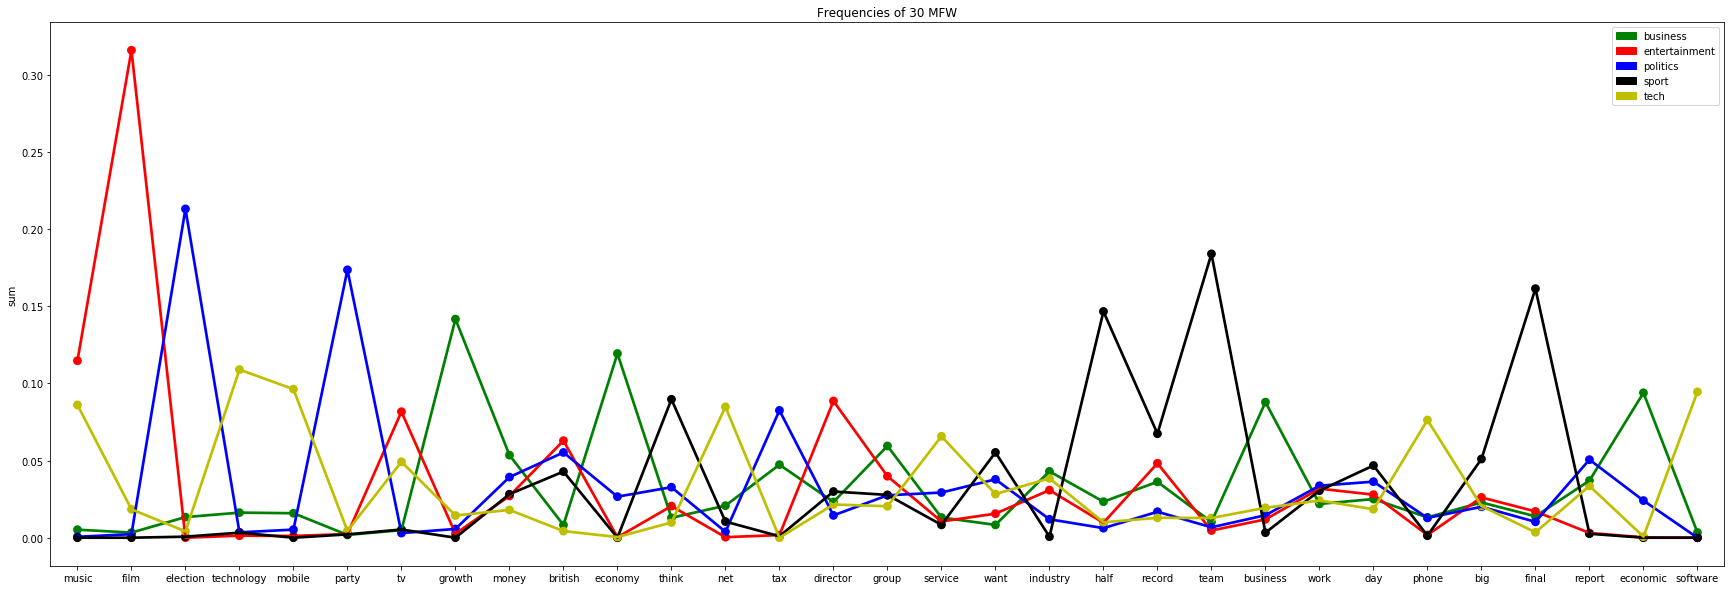

In [142]:
import matplotlib.patches as mpatches

green = mpatches.Patch(color='g', label='business')
red = mpatches.Patch(color='r', label='entertainment')
blue = mpatches.Patch(color='b', label='politics')
black = mpatches.Patch(color='k', label='sport')
yellow = mpatches.Patch(color='y', label='tech')


fig, ax = plt.subplots(figsize = (30,10))
ax = sns.pointplot(x = bus.columns, y = bus.loc['sum'], color='g')
ax = sns.pointplot(x = ent.columns, y = ent.loc['sum'], color='r')
ax = sns.pointplot(x = pol.columns, y = pol.loc['sum'], color='b')
ax = sns.pointplot(x = spo.columns, y = spo.loc['sum'], color='k')
ax = sns.pointplot(x = tec.columns, y = tec.loc['sum'], color='y')
plt.title("Frequencies of 30 MFW")
plt.legend(handles=[green, red, blue, black, yellow])
#plt.savefig("../../Bilder/Datenexploration/MFW30_categroy/freq_30mfw_korrekt")